# Exploratory Data Analysis
Simple exploration to better understand the data and draw some simple insights before building the actual model.

In [1]:
# Import section
## Default packages 
import os

## Installed packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing
In order to run evaluation contained locally, we will split the training data into train, validation and test sets. At this point you only have the `data/raw/cs-training.csv`. To generate the processed data, under the `src` folder, run:

```bash
python3 data_preprocessing.py
```

The next section will load the training data, for analysis.

In [2]:
TRAIN_PATH = os.path.join(os.getcwd(), "..", "data", "processed", "train.csv")
df = pd.read_csv(TRAIN_PATH)

In [3]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1.000000,38,0,4.000000,NaN,5,0,0,0,0.0
1,0,1.000000,52,0,554.000000,NaN,1,0,1,0,0.0
2,0,0.029639,67,0,0.098451,2000.0,3,0,1,0,0.0
3,0,0.042685,45,0,0.386376,8866.0,19,0,2,0,1.0
4,0,0.974935,34,0,0.048905,11000.0,8,0,0,0,0.0


## Headers explained
The fields which are not clear outright are explained below, taken from the data dictionary of the dataset.

* **SeriousDlqin2yrs** - Is the user high risk?: The thing we are trying to model.
* **RevolvingUtilizationOfUnsecuredLines** - Percentage of usage of Credit cards and personal lines of credit.
* **NumberOfTime30-59DaysPastDueNotWorse** - Number of times borrower has been 30-59 days past due but no worse in the last 2 years.
* **DebtRatio** - Monthly debt payments, alimony,living costs divided by monthy gross income
* **NumberOfTimes90DaysLate** - Number of times borrower has been 90 days or more past due.
* **NumberRealEstateLoansOrLines** - Number of mortgage and real estate loans including home equity lines of credit.
* **NumberOfTime60-89DaysPastDueNotWorse** - Number of times borrower has been 60-89 days past due but no worse in the last 2 years.


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,105000.0,0.066838,0.249743,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,105000.0,6.412766,271.915479,0.0,0.029479,0.153892,0.557832,50708.0
age,105000.0,52.280248,14.787298,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,105000.0,0.415390,4.135866,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,105000.0,351.923871,1959.917438,0.0,0.175386,0.366166,0.865063,326442.0
MonthlyIncome,84263.0,6632.706372,13988.521069,0.0,3400.000000,5400.000000,8220.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,105000.0,8.463029,5.153794,0.0,5.000000,8.000000,11.000000,57.0
NumberOfTimes90DaysLate,105000.0,0.260524,4.111298,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,105000.0,1.016105,1.119171,0.0,0.000000,1.000000,2.000000,32.0
NumberOfTime60-89DaysPastDueNotWorse,105000.0,0.235267,4.097753,0.0,0.000000,0.000000,0.000000,98.0


In [6]:
(df["age"] == 0).sum()

np.int64(1)

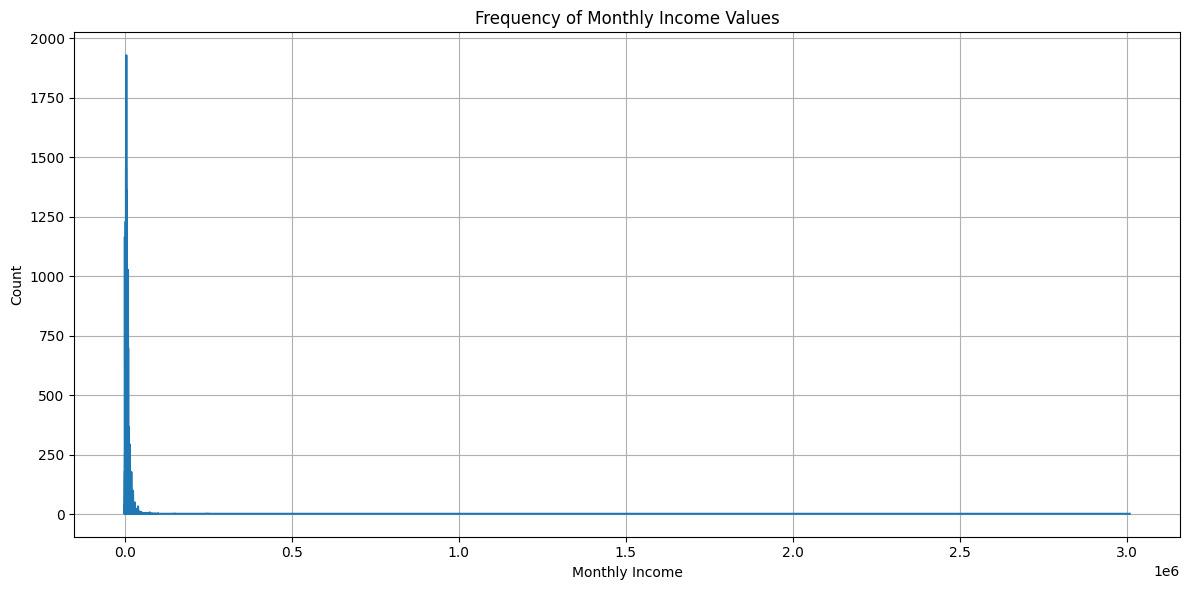

In [11]:
# Check what's the best imputation for monthly income by plotting the frequency
income_series = df["MonthlyIncome"].dropna()
income_freq = income_series.value_counts().sort_index()

# Plot for "visualisation"
plt.figure(figsize=(12, 6))
sns.lineplot(x=income_freq.index, y=income_freq.values)
plt.title("Frequency of Monthly Income Values")
plt.xlabel("Monthly Income")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

## Observations
### The cool stuff
1. We can see that the people on this are pretty old as 25th percentile is 41 and the max is 109 (wow).
2. The debt ratio goes from a safe 17.5% to above 86.5% (bad decisions amirite).
3. Someone has 20 dependents (wouldn't wanna be that guy).
4. There's a total of 105000 records on the train data — can make it work with normal ML methods (no neural networks yay).

### The sad stuff
1. We can see that the min `age` is 0, unless a new born has a credit history (highly unlikely), we have missing or noisy data. Since there's only one outlier we can drop it, no point in imputing.
2. `NumberOfDependents` and `MonthlyIncome` is also missing for a substantial amount of records. We might have to explore imputation methods.
* `MonthlyIncome` is right skewed (since the tail is on the right), so mean is not a good imputation. Since `MonthlyIncome` can be safely assumed as a continuous variable (as evident from the graph), we can use median as the imputation (fill missing values with median of the distribution).
* `NumberOfDependents` on the other hand can be imputed using mode as it can be treated as categorical (not a large range — goes from 0 to 20).
3. `SeriousDlqin2yrs` 75% is still 0, this means the dataset is highly skewed, with a very minor chunk actually high risk. Realistic as not 50% of the real world population is high risk but we need to consider this in our modelling. Well, there goes accuracy as a metric.
4. `RevolvingUtilizationOfUnsecuredLines` is a percentage yet the max value is 50708.0 (o_O). Best to cap off at an acceptable value assuming anything above is noise. Similar issue with `DebtRatio` as well.
5. 98 as a value for both `NumberOfTimes90DaysLate`, `NumberOfTime60-89DaysPastDueNotWorse` and `NumberOfTime30-59DaysPastDueNotWorse` seems a bit suspicious. Also can be capped.

We will use the `data_preprocessing.py` file again but a new method to impute the values. At this point in time, I think we can take a pause, clean the data and then comeback if we want to explore more and see.